In [1]:
# 많은 경우 구현의 상세 사항을 실제로 알아야 할 필요는 없다.
# 하지만 어떻게 작동하는지 잘 이해하고 있으면 적절한 모델, 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼파라미터를 빠르게 찾을 수 있다.
# 또한 작동 원리를 이해하고 있으면 디버깅이나 에러를 효율적으로 분석하는데 도움이 된다.
# 선형회귀와 관련된 알고리즘(Logistic Regression, SoftMax Regression까지)들은 신경망을 이해하고 구축하는데 필수적인 내용이다.

#### 공부 전 참고
> np.random.randint(x,y)
 : x~y 사이의 임의의 수 한 개 추출
 
> np.random.rand(x,y)
 : 0~1사이값들을 균일분포 난수를 x*y matrix로 생성
 
> np.random.randn(x,y)
 : 평균이0, 표준편차가1 인 표준정규분포 난수를 x*y matrix로 생성

In [71]:
x = np.random.randint(10,20)
x

11

(array([ 98.,  90., 112., 110.,  95., 104.,  73., 129.,  96.,  93.]),
 array([0.00216388, 0.10183583, 0.20150778, 0.30117973, 0.40085168,
        0.50052363, 0.60019559, 0.69986754, 0.79953949, 0.89921144,
        0.99888339]),
 <BarContainer object of 10 artists>)

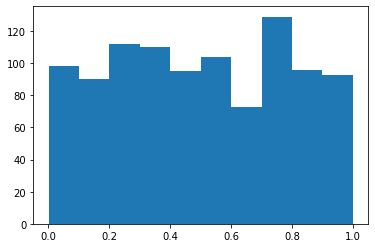

In [155]:
x = np.linspace(0,1,1000)
y = np.random.rand(1000,1)
plt.hist(y)

In [103]:
y.shape

(100, 1)

(array([3.7000e+01, 6.3400e+02, 5.0790e+03, 1.8123e+04, 3.2147e+04,
        2.8636e+04, 1.2499e+04, 2.5660e+03, 2.6400e+02, 1.5000e+01]),
 array([-4.2131615 , -3.33909178, -2.46502205, -1.59095233, -0.71688261,
         0.15718711,  1.03125683,  1.90532655,  2.77939628,  3.653466  ,
         4.52753572]),
 <BarContainer object of 10 artists>)

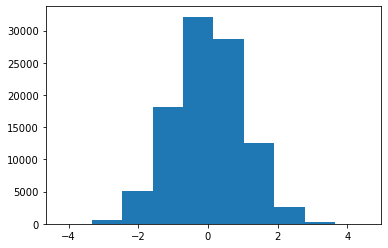

In [161]:
x = np.linspace(-10,10,100)
y = np.random.randn(100000,)
plt.hist(y)

# 4-1 선형회귀

In [2]:
# 일반적으로 선형모델은 입력 특성의 가중치 합과 편향(=절편)이라는 상수를 더해 예측을 만든다
# 가설함수 h(x) = w0 + w1*x1 + w2*x2 + ... + xnxn
# h(x)는 예측값, n은 특성 수, w는 특성의 가중치(모델 파라미터)이다.

# 회귀에서 가장 널리 사용되는 성능 지표는 평균 제곱근 오차(RMSE)이다.
#  == MSE가 최소가 되는 가중치 값을 찾아도 같다.

# 선형회귀 모델의 MSE 비용함수는 전체에 대한 제곱이다. 이는 convex function 를 뜻하며 미분을 했을 때 0이 나오면 이를 최솟값이라고 할 수 있다.
# 가중치 벡터들을 구하는 정규방정식은 inv(X.T.dot(X)).dot(X.T.dot(y))이다.
# X는 특성에 대한 독립변수들의 벡터를 의미하고, y는 각 샘플들의 입력값에 대한 예측값 벡터이다.

In [19]:
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

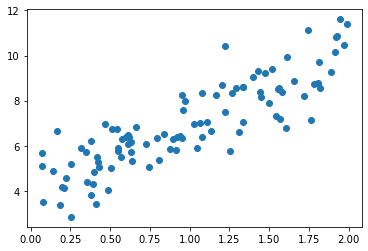

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [21]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [22]:
theta_best

array([[3.98861103],
       [3.03624837]])

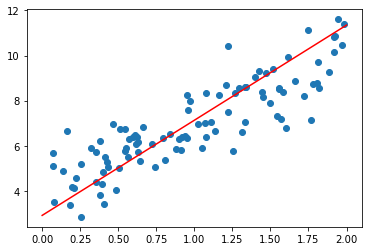

In [23]:
plt.scatter(X,y)
X_a = np.linspace(0,2,1000)
plt.plot(X_a,X_a * 4.2153 + 2.91784,c='r')

### 위 정규방정식을 따라 풀면 계수와 절편 값이 우리가 설정한 값과 비슷하게 나오는 것을 확인할 수 있다.
### 우리는 y에 대한 식을 y = 3x + 4 로 했는데 잡음으로 인해 정확하게 예측하진 못했지만 유사한 값을 얻었다

In [24]:
# 사이킷런에서 선형 회귀 실행
# 사이킷런에서 LinearRegression 은 계산을 할 때, 유사역행렬을 구한다.(역행렬이 없다면 작동하지않는 오류해결 또한 극단적인 경우도 처리할 수 있게 효율적인 방법이다)
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)

LinearRegression()

In [25]:
print('X 계수 : ',LR.coef_)
print('y 절편 : ',LR.intercept_)

X 계수 :  [[3.03624837]]
y 절편 :  [3.98861103]


In [26]:
# x 변수가  1.523 값을 가진다면 이 선형모델은 8.65917을 예측하는 것을 확인할 수 있다.
ex1 = np.array([1.523])
LR.predict(ex1.reshape(-1,1))

array([[8.6128173]])

In [11]:
# 정규방정식은 O(n**2.4) ~ O(n**3) 사이의 계산 복잡도를 가진다.
# 사이킷런의 방식으로 계산하면 O(n**2) 의 계산 복잡도를 가진다.
# 특성의 개수가 늘어나면 효율적으로 처리 할 수 없다.
# 하지만 예측은 매우 빠르다.

# 4-2 경사 하강법(Gredient Descent)

In [12]:
# 여러종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다.
# 경사하강법의 기본 아이디어는 비용 함수를 최소화 하기 위해 반복해서 파라미터를 조절해가는 것이다.

In [13]:
# 현재의 descent를 계산하고 우리가 정하게 되는 학습률에 따른 descent를 계산 한 후 감소하는 방향으로 진행한다.
# 기울기가 0이 되면 최솟값에 도달한다.
# 학습률은 하이퍼파리미터 값으로 정하게 되며, 적절한 값을 정하지 않으면 반대편으로 건너뛰어 발산하게 될 수 도 있다.
# 경사하강법의 개념은 선형모델에 맞춰진 것이 아니라 다양한 알고리즘에서 사용되는데, 적어도 선형 회귀를 위한 MSE 비용함수는 Convex 하기 때문에 지역최솟값에 수렴하는 일이 없다.(항상 전역최솟값)
# Gredient Descent 반드시 모든 특성이 같은 스케일을 갖도록 scaling이 필수

## 4-2-1 배치 경사 하강법

In [14]:
# 각 특성(feature)의 가중치에 대한 Gredient Descent 를 계산해야한다. 
# 각 가중치에 대한 편미분 식을 구한다.
# 배치 경사 하강법은 한번의 스텝에서 훈련 데이터 전체를 사용한다.
# 매우 큰 데이터에 대해 아주 느리다.
# 특성이 매우 많은 경우에는 유리한데, 정규방정식, SVD 분해보다 경사하강법이 훨씬 더 빠르다.

In [16]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[3.99587852],
       [3.04023469]])

In [27]:
# 학습률이 너무 낮으면 최적점에 도달하는데 시간이 오래걸린다
# 학습률이 너무 크면 최적점을 넘어간 후 발산해 버린다.
# 경사 하강법의 반복횟수는 아주 크게 지정하고 벡터의 노름이 어떤 값(오차)보다 작아지면 최솟값에 도달한 것으로 가정하고 종료시키는 것이 좋다.

## 4-2-2 확률적 경사 하강법

In [31]:
# 배치 경사 하강법의 문제점은 전체 훈련 세트를 사용해 기울기를 계산한다는 것이다.(훈련 세트가 커지면 매우 느려지게 된다.)
# Stochastic Gredient Descent 는 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산
# 알고리즘이 훨씬 빠르다. 하지만 확률적(무작위)이기 때문에 최솟값까지 부드럽게 감소하지않고 위아래로 요동치며 감소한다.
# 시간이 지나면 최솟값에 매우 근접하지만 이게 반드시 최적치는 아닐 수 있다.
# 최적치가 아닐 수 있는 것에 대한 딜레마의 해결법은 학습률을 점진적으로 감소시켜주는 것이다.
# 비용함수가 불안정할때 이 알고리즘은 지역최솟값을 건더뛰도록 도와줄 수 있다.

In [43]:
n_epochs = 50
t0, t1 = 5,50
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epochs in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epochs*m + i)
        theta = theta - eta * gradients
print(theta)

[[4.00369191]
 [3.03944954]]


In [44]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=1000,tol = 1e-3, penalty=None, eta0=0.1)
sgd.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [48]:
sgd.coef_

array([3.03935825])

In [49]:
sgd.intercept_

array([3.97303951])

# 4-3 다항 회귀